In [19]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [20]:
df = pd.read_excel('Google Merchandise Store.xlsx',index_col='Day Index', parse_dates=True)
df.head()

,New Users
Day Index,
2021-05-12,1896
2021-05-13,1624
2021-05-14,1525
2021-05-15,1187
2021-05-16,1314


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2021-05-12 to 2022-05-12
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   New Users  366 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


<AxesSubplot:xlabel='Day Index'>

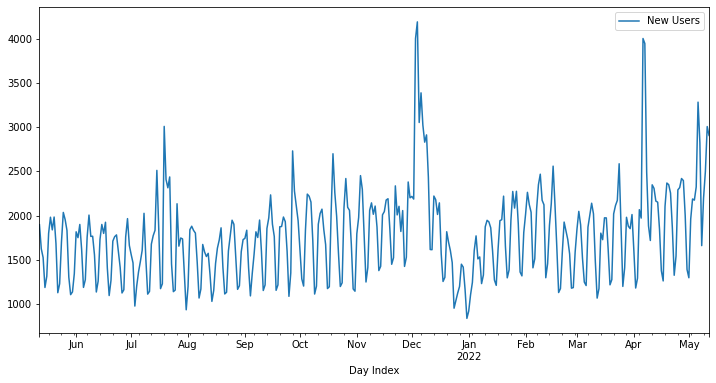

In [22]:
df[['New Users']].plot(figsize = (12,6))

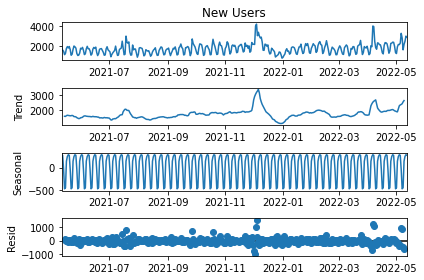

In [23]:
decompose_result = seasonal_decompose(df["New Users"])
decompose_result.plot();

In [24]:
df.index.freq = "D"
alpha = 0.2

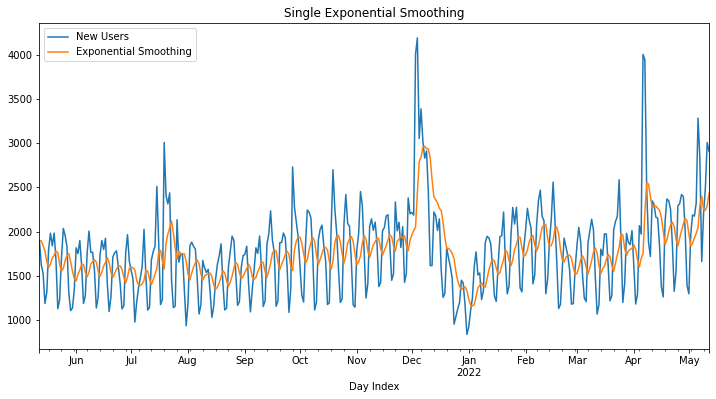

In [25]:
# Single Exponential Smoothing 
df["Exponential Smoothing"] = SimpleExpSmoothing(df["New Users"]).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
df[["New Users","Exponential Smoothing"]].plot(title="Single Exponential Smoothing",figsize = (12,6));

# התחזית של החלקה מעריכית יחידה לא מתאימה.  היא לא מתחשבת בעונתיות

In [26]:
df

,New Users,Exponential Smoothing
Day Index,,
2021-05-12,1896,1896.000000
2021-05-13,1624,1896.000000
2021-05-14,1525,1841.600000
2021-05-15,1187,1778.280000
2021-05-16,1314,1660.024000
...,...,...
2022-05-08,1660,2398.962858
2022-05-09,2196,2251.170286
2022-05-10,2497,2240.136229


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


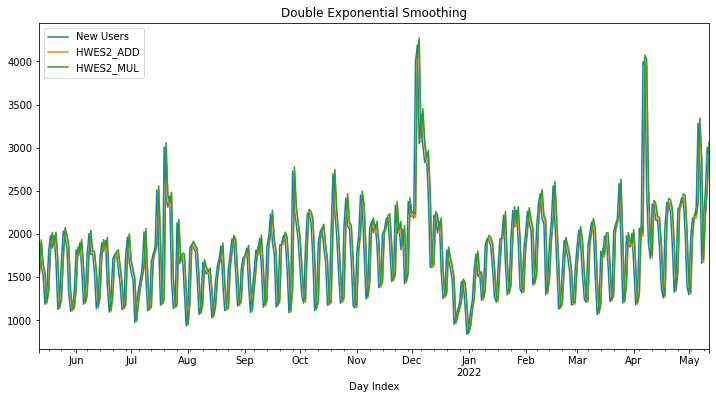

In [27]:
# Double Exponential Smoothing # שיטת הולט
df["HWES2_ADD"] = ExponentialSmoothing(df["New Users"],trend="add").fit().fittedvalues
df["HWES2_MUL"] = ExponentialSmoothing(df["New Users"],trend="mul").fit().fittedvalues
df[["New Users","HWES2_ADD","HWES2_MUL"]].plot(title="Double Exponential Smoothing",figsize = (12,6));

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


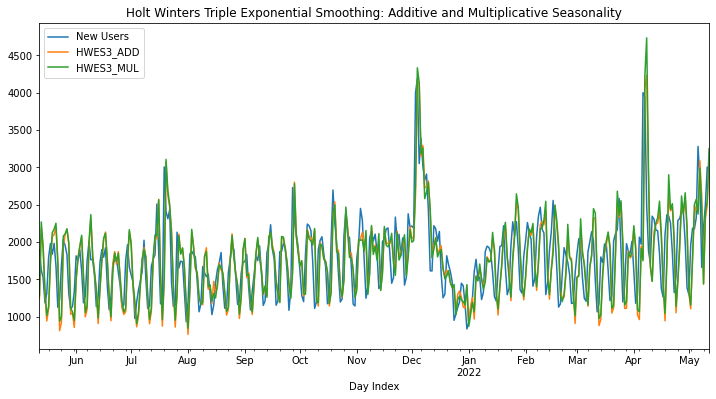

In [28]:
# Triple Exponential Smoothing # שיטת וינטרס

df["HWES3_ADD"] = ExponentialSmoothing(df["New Users"],trend="add",seasonal="add",seasonal_periods=55).fit().fittedvalues
df["HWES3_MUL"] = ExponentialSmoothing(df["New Users"],trend="mul",seasonal="mul",seasonal_periods=55).fit().fittedvalues
df[["New Users","HWES3_ADD","HWES3_MUL"]].plot(title="Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality",figsize = (12,6));



In [29]:
df.shape

(366, 6)

In [30]:
forecast_data = pd.read_excel("Google Merchandise Store.xlsx",index_col='Day Index',parse_dates=True)
forecast_data.index.freq = "D"

train_df = forecast_data[:120] # נתונים ראשונים
test_df = forecast_data[120:366] # נתונים אחרונים

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

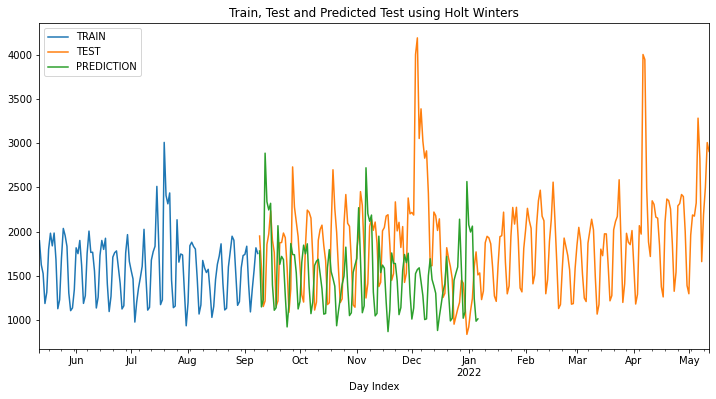

In [31]:
# תחזית
fitted_model = ExponentialSmoothing(train_df["New Users"],trend="mul",seasonal="mul",seasonal_periods=55).fit()
test_predictions = fitted_model.forecast(120)
train_df["New Users"].plot(legend=True,label="TRAIN",figsize = (12,6))
test_df["New Users"].plot(legend=True,label="TEST",figsize = (12,6))
test_predictions.plot(legend=True,label="PREDICTION",figsize = (12,6))
plt.title("Train, Test and Predicted Test using Holt Winters")

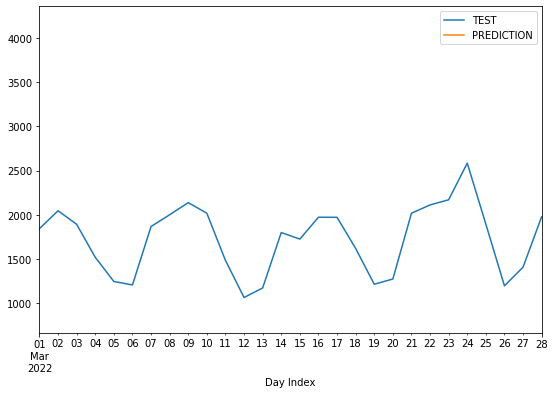

In [32]:
test_df["New Users"].plot(legend=True,label="TEST",figsize=(9,6))
test_predictions.plot(legend=True,label="PREDICTION",xlim=["2022-03-01","2022-03-28"]);

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f"Mean Absolute Error = {mean_absolute_error(test_df,test_predictions)}")
print(f"Mean Squared Error = {mean_squared_error(test_df,test_predictions)}")

ValueError: Found input variables with inconsistent numbers of samples: [246, 120]